# Abalone case study

## Data Discription

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Attribute in formation

admdkm

## Import libraries 

importing some libraries to get start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

## The Data

To start working on data we have to upload that into file where we are working to that, we are reading 'abalone.csv' into a pandas dataframe

In [2]:
df=pd.read_csv('abalone.csv')

## Exploratort Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical Summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

head() function gives first 5 rows of dataset

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


tail() function gives last 5 rows of dataset

In [4]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


sample() function gives samples which we mentioned in it, but it gives randomly

In [5]:
df.sample(8)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
932,I,0.445,0.350,0.130,0.4195,0.1695,0.0945,0.1195,7
973,M,0.525,0.400,0.140,0.7325,0.3340,0.1575,0.1700,11
2731,I,0.410,0.315,0.100,0.3000,0.1240,0.0575,0.1000,8
1955,F,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675,12
500,F,0.580,0.440,0.180,0.8540,0.3665,0.1635,0.2450,12
470,F,0.530,0.440,0.135,0.7835,0.3130,0.1715,0.2185,9
748,M,0.535,0.420,0.130,0.8055,0.3010,0.1810,0.2800,14
3075,F,0.680,0.520,0.185,1.4940,0.6150,0.3935,0.4060,11


shape function shows the dimention of dataset

In [6]:
df.shape

(4177, 9)

we have 4177 row and 9 columns 

dtype function gives data type of each column

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

we have Sex attribute is object dtype and Rings attribute is int64 and remaining attributers [Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight] are float64

info() function gives the information about columns,non-null values count and dtype of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### summary statistics

isnull() function is use to determine the null value in the data. it gives True and False values if it giving True it means that is a null valueand if it gives False it is not null value

In [9]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


isnull().sum() is give to count of null vlaues in the total coumn 

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there is no null value in the dataset

#### Describing the Data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

In [12]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

isnull().sum() function gives that the count of missing values in column 

#####  uni-variate plot

plotting by using one variate that is know as uni-variate plot

<AxesSubplot:>

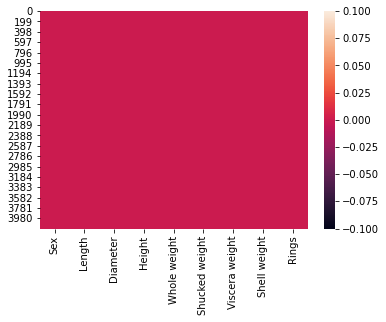

In [13]:
sns.heatmap(df.isnull())

By the heatmap we can see the clearly we don't have null values in data if we have null values in data it gives different shape in place of missing value

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


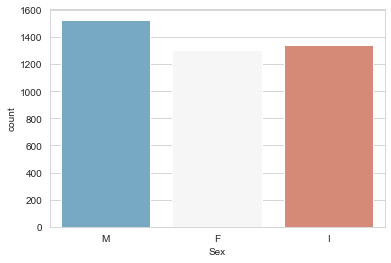

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df,palette='RdBu_r')
print(df['Sex'].value_counts())

countplot gives the count of differnt attribute values. In Sex attribute we have 3 values["male-M","female-F","infant-I"]

plot shows in bars so we got 3 different bars,each bar indicate the count of that particular variable 

we have M-1528,I-1342,F-1307

Text(0.5, 1.0, 'Length')

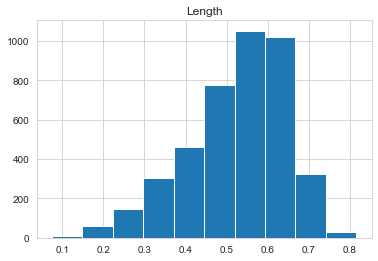

In [15]:
plt.hist(x='Length',data=df)
plt.title("Length")


The histogram is used for attribute whose values are numerical and measured on an interval scale. It can also help to detect any unusual gaps (outlier ) in intervals

here we are ploting Lenght intervales of shalls

<AxesSubplot:xlabel='Rings'>

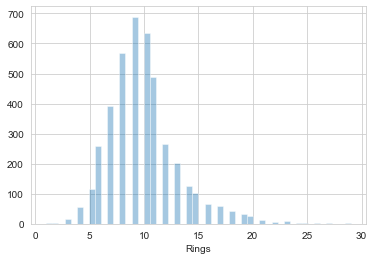

In [16]:
sns.distplot(a=df['Rings'], kde=False)

distplot() displays a distrinution and range of a set of numeric values plotted against a dimension.

The plots shows that distribution of rings high no. of rings in between range(5,15) rings in the data  

##### Bi-variate plot 

ploting the plot by passing 2 variates one is X- axis and second ona is Y-axis

<AxesSubplot:xlabel='Length', ylabel='Height'>

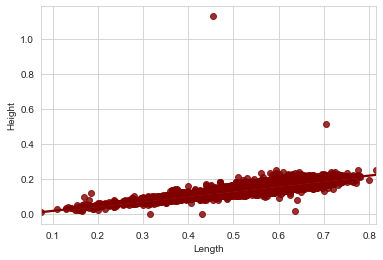

In [17]:
sns.regplot(x=df['Length'],y=df['Height'],color='maroon')

regplot shows that no. of mutual exclusive options for estimating the linear regression in both columns

Scatter plots relationships between two numeric variables, the dots in a scatter plot not only report the values of individual data points,but also patterens when the data are taken as a whole, indentification of correlation relationship are common with scatter plots

<AxesSubplot:xlabel='Diameter', ylabel='Height'>

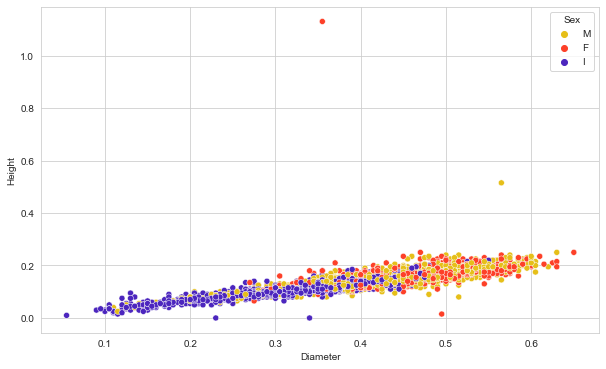

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Diameter'], y=df['Height'], hue=df['Sex'],palette='CMRmap_r')

Plot shows good relation between Diameter and Height we can see outliers also in this plot

lmplot is a 2D scatterplot with an optional overlaid regressionline. This is useful for comparing numeric variables

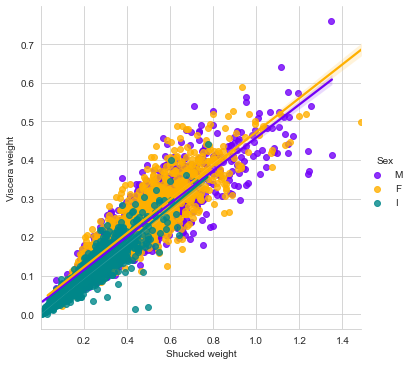

In [19]:
sns.lmplot(x="Shucked weight", y="Viscera weight", hue="Sex", data=df,palette='prism_r')

Thejoint plot give 2 answer in one plot

The histogram on the top shows the distribution of the variable at the x-axis and the histogram to the right shows the distribution of the variable at the y-axis. And the scatter plot shows the correlation between both variables

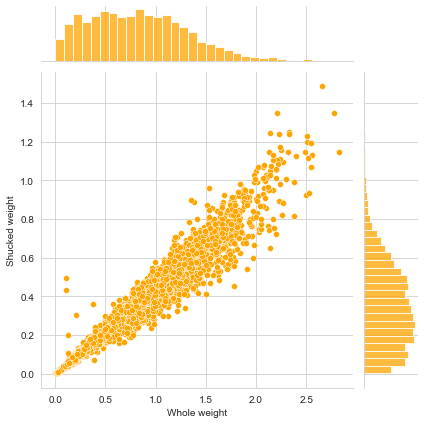

In [20]:
sns.jointplot(x=df['Whole weight'],y=df['Shucked weight'],color='orange')

##### multi-variate plot

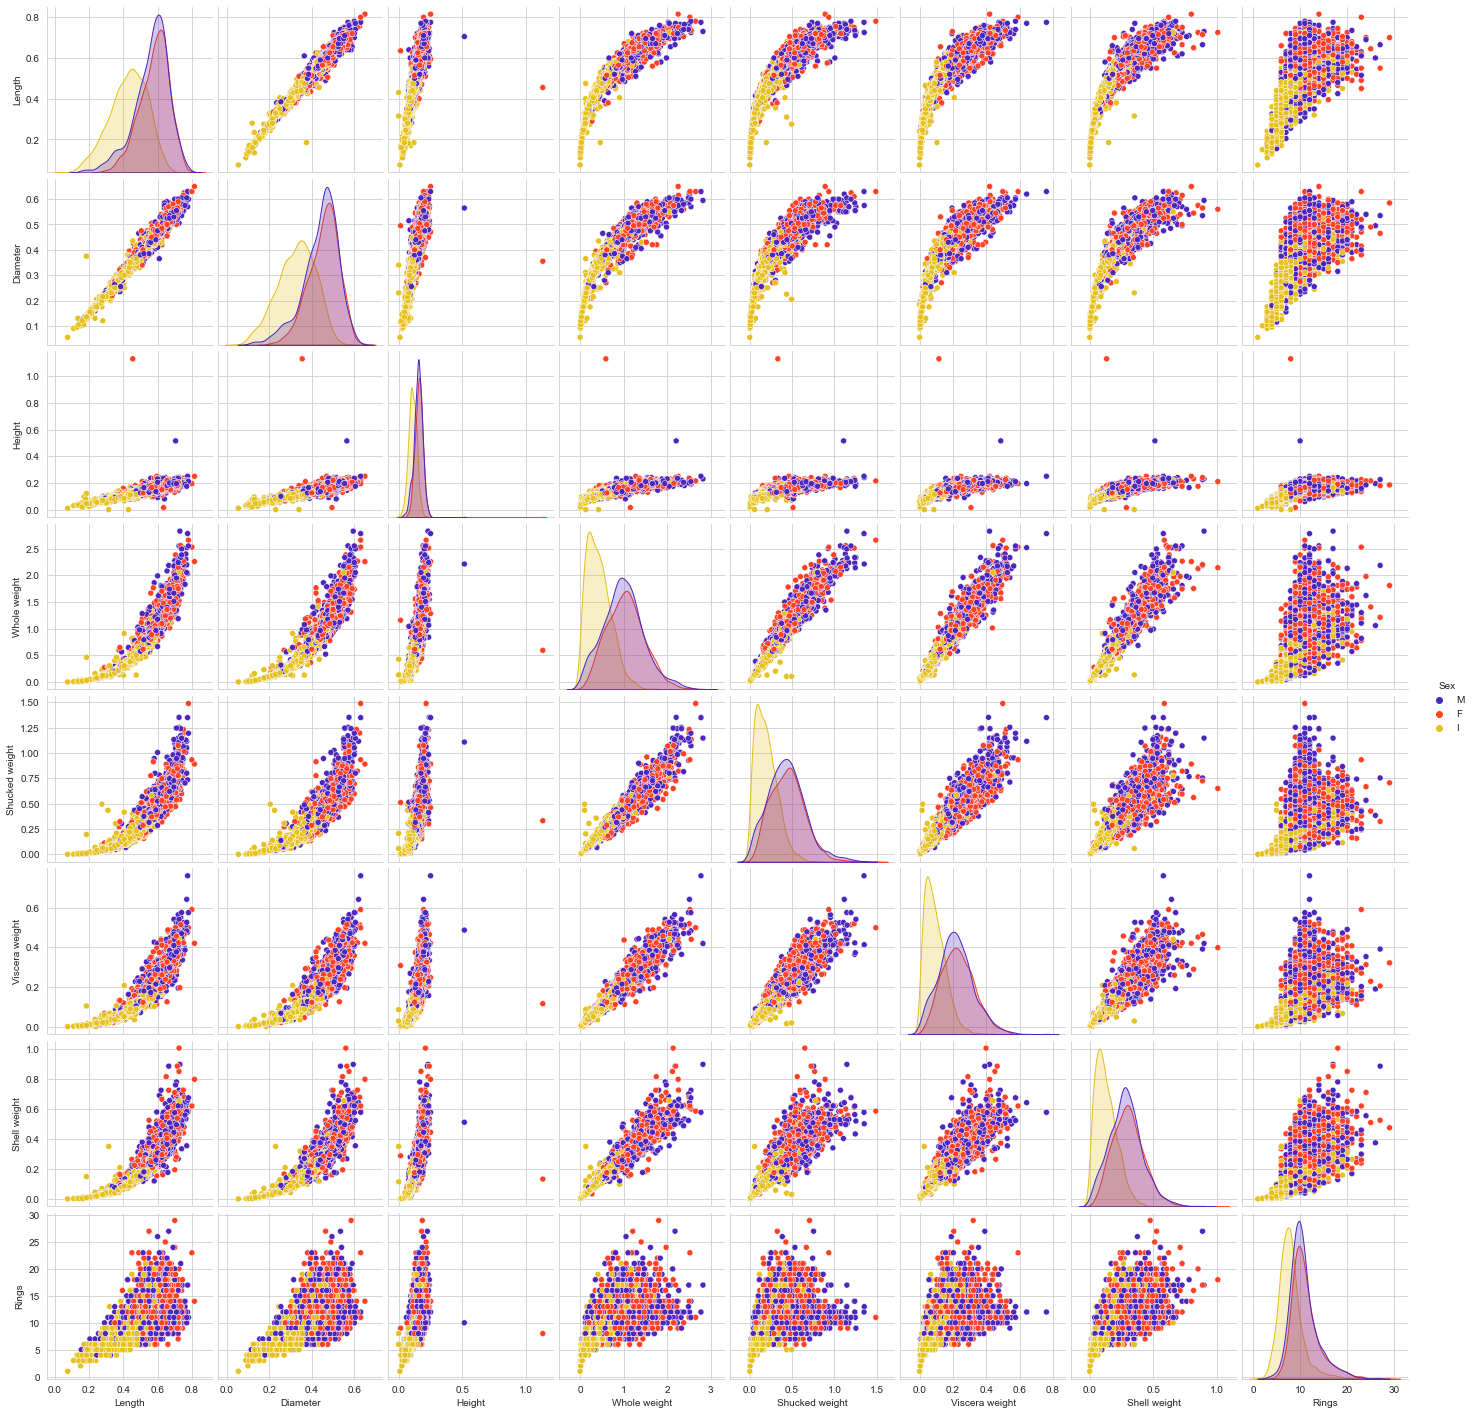

In [21]:
sns.pairplot(df,hue='Sex',palette="CMRmap")

## check the correlation

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.This is when one variable increases while the other increases and visa versa

In [22]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

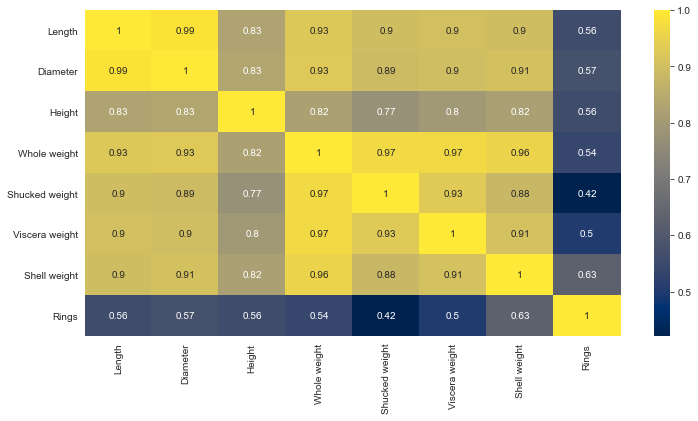

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='cividis',annot=True)

Correlation coefficients quantify the association between variables or features of a dataset. good correlation rang is between 0.5 to 1

as per our data we have good correlation between each attribute as well as with the target also 

## Check outlier

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Here we no need to plot Rings because it is a target variable

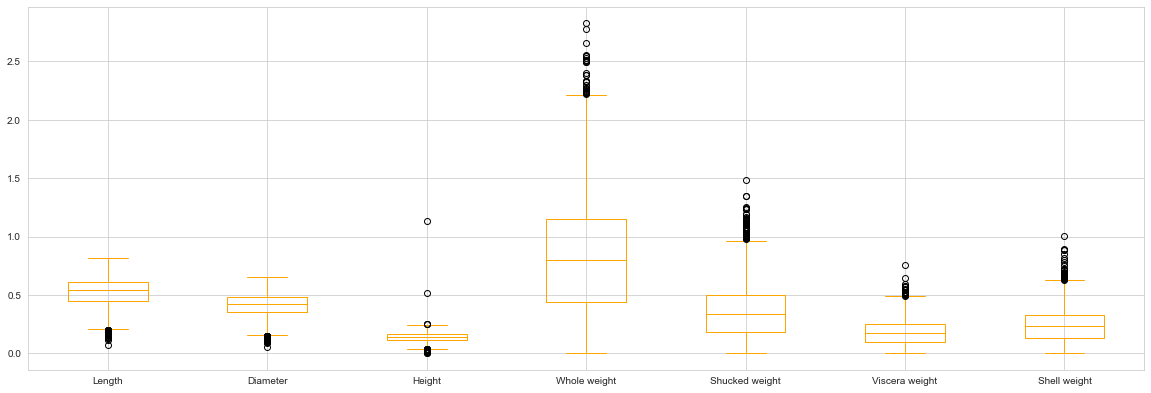

In [24]:
df.iloc[:,0:8].boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

we have outliers in the given dataset so we need to remove outlier

before removing outliers we need to drop Sex because Sex is object type data

### Functions defining

In [25]:
# function to plot histogram

def hist(data_frame,feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(6,6))
    sns.distplot(data_frame[feature_name],color='orange')
    

In [26]:
# Function for make Boxplot

def boxplot(data_frame,feature_name):
    plt.figure(figsize=(6,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name],color='red')

In [27]:
#for normal distributed

def outlier_norm(data_frame,feature):
    uppper_boundary=data_frame[feature].mean() + 3* data_frame[feature].std()
    lower_boundary=data_frame[feature].mean() - 3* data_frame[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

In [28]:
# for skewed outliers 

def outlier_IQR(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

In [29]:
#for extreme outliers

def outlier_extreme(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*3)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*3)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

### checking outliters and removing outliers of the features

###### Length feature

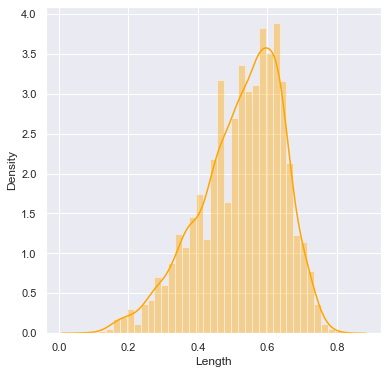

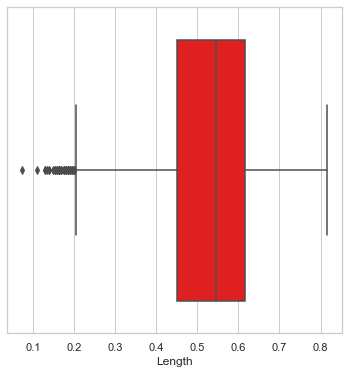

In [30]:
hist(df,'Length')
boxplot(df,'Length')

we have outliers in the Length feature, the feature is left skewed 

In [31]:
print(df['Length'].min())
print(df['Length'].max())

0.075
0.815


In [32]:
outlier_IQR(df,'Length')

lower_boundary: 0.20250000000000004
uppper_boundary 0.8624999999999999


In [33]:
df.loc[df['Length']<0.2025,'Length']=0.2025

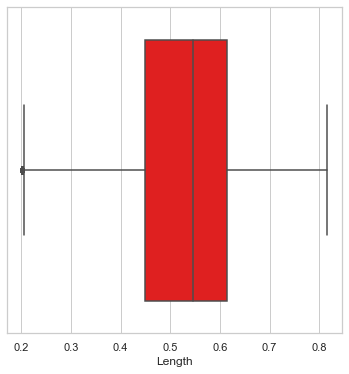

In [34]:
boxplot(df,'Length')

Removed outliers in Length feature

###### Diameter feature

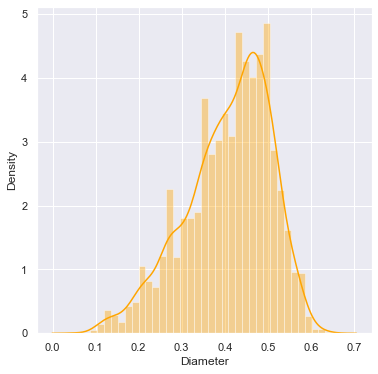

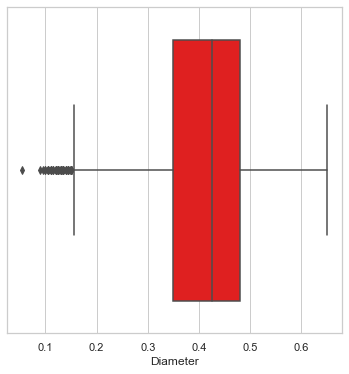

In [35]:
hist(df,'Diameter')
boxplot(df,'Diameter')

we have outliers in the Diameter feature, the feature is left skewed 

In [36]:
print(df['Diameter'].min())
print(df['Diameter'].max())

0.055
0.65


In [37]:
outlier_IQR(df,'Diameter')

lower_boundary: 0.15499999999999997
uppper_boundary 0.675


In [38]:
df.loc[df['Diameter']<0.154,'Diameter']=0.154

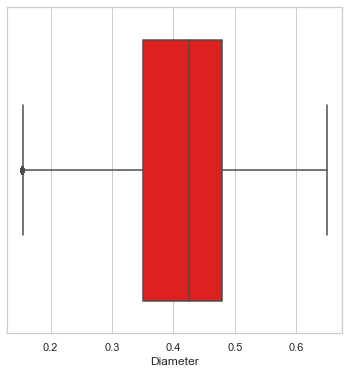

In [39]:
boxplot(df,'Diameter')

outlier removed in Diameter feature

###### Height feature

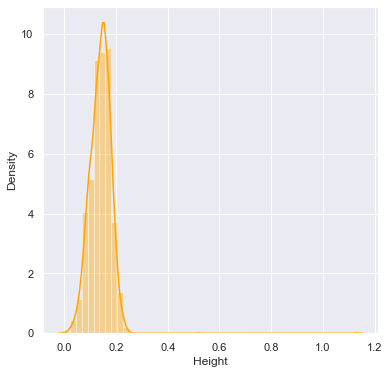

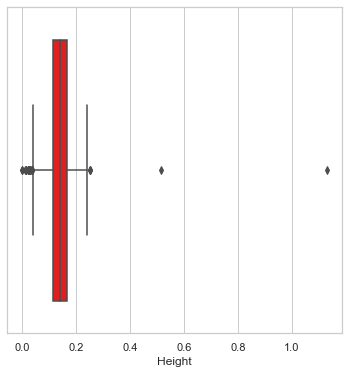

In [40]:
hist(df,'Height')
boxplot(df,'Height')

outliers are present in Height feature and it is right skewed

In [41]:
print(df['Height'].min())
print(df['Height'].max())

0.0
1.13


In [42]:
outlier_IQR(df,'Height')

lower_boundary: 0.039999999999999994
uppper_boundary 0.24000000000000002


In [43]:
df.loc[df['Height']>0.24,'Height']=0.24
df.loc[df['Height']<0.0394,'Height']=0.0394

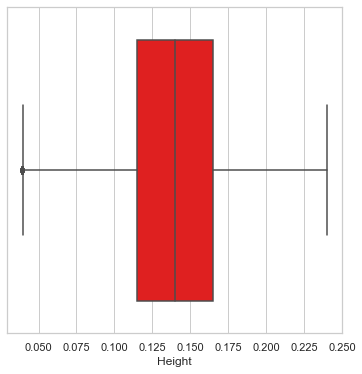

In [44]:
boxplot(df,'Height')

outliers are removed in Height feature

###### Whole weight feture

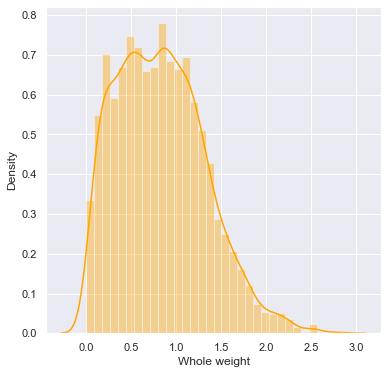

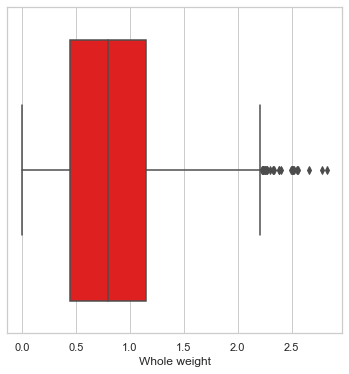

In [45]:
hist(df,'Whole weight')
boxplot(df,'Whole weight')

outliers are there in Whole weight and it is normally distributed

In [46]:
print(df['Whole weight'].min())
print(df['Whole weight'].max())

0.002
2.8255


In [47]:
outlier_norm(df,'Whole weight')

lower_boundary: -0.6424248952484118
uppper_boundary 2.2999092141375717


In [48]:
df.loc[df['Whole weight']>2.299,'Whole weight']=2.299

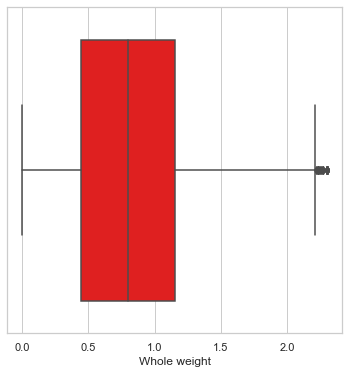

In [49]:
boxplot(df,'Whole weight')

outliers are removed

###### Shucked weight feature

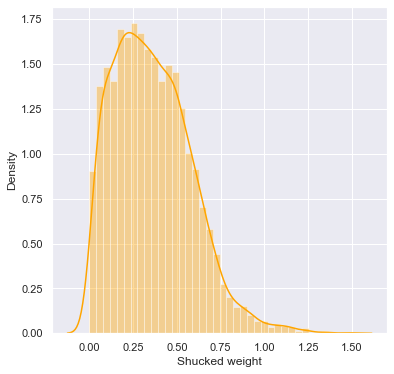

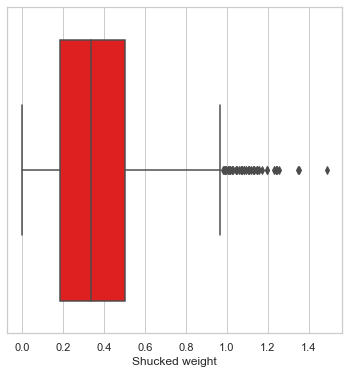

In [50]:
hist(df,'Shucked weight')
boxplot(df,'Shucked weight')

Shucked weight has outliers and it is right skewed

In [51]:
print(df['Shucked weight'].min())
print(df['Shucked weight'].max())

0.001
1.4880000000000002


In [52]:
outlier_IQR(df,'Shucked weight')

lower_boundary: -0.2879999999999999
uppper_boundary 0.976


In [53]:
df.loc[df['Shucked weight']>0.976,'Shucked weight']=0.976

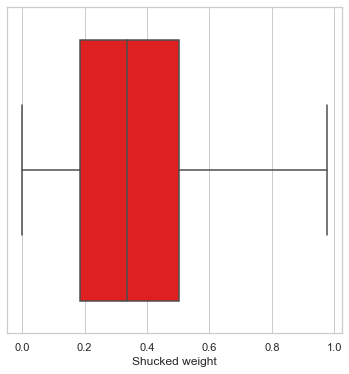

In [54]:
boxplot(df,'Shucked weight')

Removed outliers is Shucked weight

###### Viscera weight feture

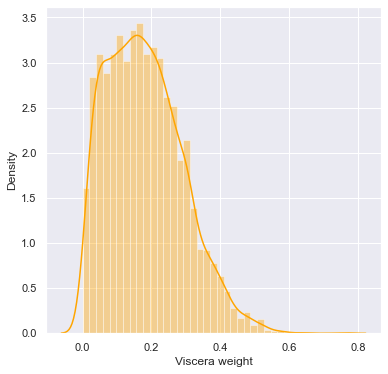

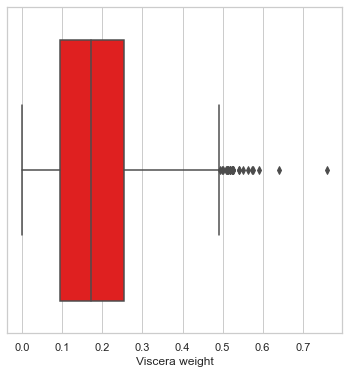

In [55]:
hist(df,'Viscera weight')
boxplot(df,'Viscera weight')

Viscera weight has outliers and it is right skewed

In [56]:
print(df['Viscera weight'].min())
print(df['Viscera weight'].max())

0.0005
0.76


In [57]:
outlier_IQR(df,'Viscera weight')

lower_boundary: -0.14575000000000002
uppper_boundary 0.49225


In [58]:
outlier_norm(df,'Viscera weight')

lower_boundary: -0.14824914292652724
uppper_boundary 0.5094363586315793


In [59]:
df.loc[df['Viscera weight']>0.4922,'Viscera weight']=0.4922

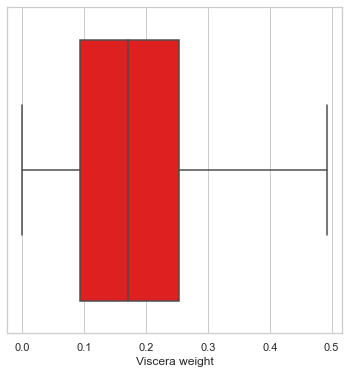

In [60]:
boxplot(df,'Viscera weight')

In [61]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

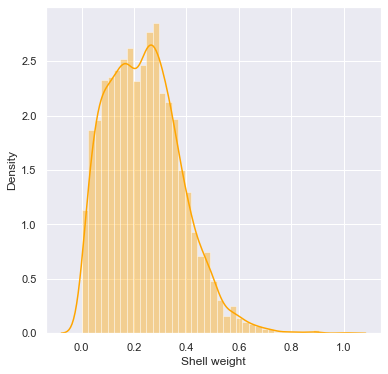

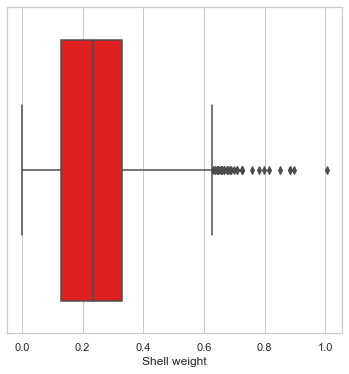

In [62]:
hist(df,'Shell weight')
boxplot(df,'Shell weight')

In [63]:
print(df['Shell weight'].min())
print(df['Shell weight'].max())

0.0015
1.005


In [64]:
outlier_norm(df,'Shell weight')

lower_boundary: -0.1787771490986393
uppper_boundary 0.6564388680356752


In [65]:
outlier_IQR(df,'Shell weight')

lower_boundary: -0.16849999999999993
uppper_boundary 0.6275


In [66]:
df.loc[df['Shell weight']>0.6275,'Shell weight']=0.6275

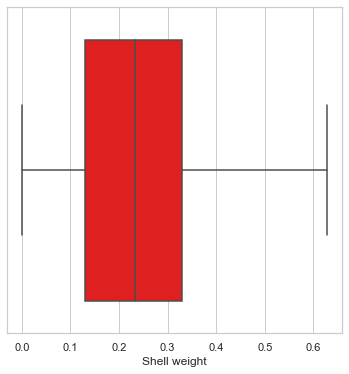

In [67]:
boxplot(df,'Shell weight')

The project is about to find the age of shells so here Rings is the taraget variable 

In [68]:
df=df.drop('Sex',axis=1)

### Spliting features and target variable

In [69]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [70]:
df.shape

(4177, 8)

In [71]:
x.shape

(4177, 7)

In [72]:
y.shape

(4177,)

In [73]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.8027250292785104 on random_state 33


this is giving the best r2_score with the random_state of 33 we have to split the dat by using this random_state and test_size 25

## Apply train_test_split to the data

In [74]:
x_train,x_tes,y_train,y_test=train_test_split(x,y,test_size=30,random_state=33)

In [75]:
x_train.shape

(4147, 7)

In [76]:
x_test.shape

(30, 7)

In [77]:
y_train.shape

(4147,)

In [78]:
y_test.shape

(30,)

here we splited our features and target variable to modle building that trains the data and predict it value with train data after that we check the accuracy of models by finding metric with the comparing the actual values and predict values

## Apply the models 

### Apply LinearRegression

In [79]:
#from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

#predition of validation data
pred=lr.predict(x_test)

In [80]:
lr.score(x_train,y_train)

0.5345720782288461

In [81]:
lr.coef_

array([ -1.15642821,  11.34792681,  24.95214469,   8.66991593,
       -20.637796  , -10.36428911,   9.08166712])

In [82]:
print("r2_score",r2_score(y_test,pred))

r2_score -0.5841741238482638


In [83]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred)))

error:
mean_squared_error: 13.66614210839769
mean_absolute_error 2.7593026354705996
sqrt_mean_squared_error 3.696774554716272


In [84]:
#cross validation score for Linear Regression
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.4175141963995932


### Apply Lasso

In [85]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.533924708861782

In [86]:
#prediction on validation data
pred1=ls.predict(x_test)

In [87]:
ls.coef_

array([  0.        ,   9.87107963,  21.52844527,   7.92983308,
       -19.9181896 ,  -8.36875593,  10.00653876])

In [88]:
print("r2_score",r2_score(y_test,pred1))

r2_score -0.5679651732326265


In [89]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred1))
print("mean_absolute_error",mean_absolute_error(y_test,pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred1)))

error:
mean_squared_error: 13.526312894420126
mean_absolute_error 2.7379368314099577
sqrt_mean_squared_error 3.677813602457325


In [90]:
#cross validation score for lasso regression
scr=cross_val_score(ls,x,y,cv=5)
print("Cross validation score of Lasso model:",scr.mean())

Cross validation score of Lasso model: 0.4183011777979514


#### Apply Randomized Searchcv on Lasso model.

In [91]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
rdm_lasso = RandomizedSearchCV(ls,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1]},
                   verbose=2)

In [92]:
rdm_lasso_pred= rdm_lasso.predict(x_test)

In [93]:
rdm_lasso.best_estimator_

Lasso(alpha=0.0001)

In [94]:
rdm_lasso.best_score_

0.5317478656717969

In [95]:
print("r2_score",r2_score(y_test,rdm_lasso_pred))

r2_score -0.5821212614299365


In [96]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_lasso_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_lasso_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_lasso_pred)))

error:
mean_squared_error: 13.648432748602254
mean_absolute_error 2.756503345756565
sqrt_mean_squared_error 3.6943785334751844


### Apply Ridge Regression

In [97]:
rg=Ridge()
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.5294276061379901

In [98]:
#prediction on validation data
rg_pred=ls.predict(x_test)

In [99]:
rg.coef_

array([  2.54584374,   7.87677606,  13.18003088,   6.96239532,
       -18.5182649 ,  -6.71880385,  11.43505141])

In [100]:
print("r2_score",r2_score(y_test,rg_pred))

r2_score -0.5679651732326265


In [101]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rg_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rg_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rg_pred)))

error:
mean_squared_error: 13.526312894420126
mean_absolute_error 2.7379368314099577
sqrt_mean_squared_error 3.677813602457325


In [102]:
#cross validation score for Ridge Regression
scr=cross_val_score(rg,x,y,cv=5)
print("Cross validation score of Ridge model:",scr.mean())

Cross validation score of Ridge model: 0.4152626540249516


### Apply Randomized Searchcv on Ridge model.

In [103]:
parameters = {"alpha":[1,2,5,10,15,20]}

rd_ridge=RandomizedSearchCV(rg,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rd_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20]},
                   verbose=2)

In [104]:
rd_ridge.best_estimator_

Ridge(alpha=1)

In [105]:
rd_ridge.best_score_

0.5257221582581615

In [106]:
# prediction on validation data
rd_ridge_pred= rd_ridge.predict(x_test)

In [107]:
print("r2_score",r2_score(y_test,rd_ridge_pred))

r2_score -0.5439179255568796


In [108]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rd_ridge_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rd_ridge_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rd_ridge_pred)))

error:
mean_squared_error: 13.318865304470682
mean_absolute_error 2.7133050562568477
sqrt_mean_squared_error 3.6495020625382146


### Apply Gradient Boosting Regressor

In [109]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.6407361575821845

In [110]:
# prediction on validation data
gbr_pred= gbr.predict(x_test)

In [111]:
r2_score(y_test,gbr_pred)

-0.5670082666854095

In [112]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,gbr_pred))
print("mean_absolute_error",mean_absolute_error(y_test,gbr_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,gbr_pred)))

error:
mean_squared_error: 13.518057980606134
mean_absolute_error 2.6980694567980406
sqrt_mean_squared_error 3.676691172862651


In [113]:
#cross validation score for Gradient Boosting Regressor
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of GradientBoostingRegressor model:",scr.mean())

Cross validation score of GradientBoostingRegressor model: 0.442856339962774


#### Apply Randomized Searchcv on GradientBoostingRegressor model.

In [114]:
parameters = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gbr,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [115]:
rdm_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=5,
                          n_estimators=400)

In [116]:
#Prediction Validation Data

rdm_gb_pred= rdm_gb.predict(x_test)

In [117]:
r2_score(y_test,rdm_gb_pred)

-0.5980535184323326

In [118]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_gb_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_gb_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_gb_pred)))

error:
mean_squared_error: 13.78587501900959
mean_absolute_error 2.72590634149838
sqrt_mean_squared_error 3.7129334789367814


### Apply Decision Tree Regressor

In [119]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [120]:
#Prediction on validation data
dt_pred= dt.predict(x_test)
r2_score(y_test,dt_pred)

-1.2527047913446676

In [121]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,dt_pred)))

error:
mean_squared_error: 19.433333333333334
mean_absolute_error 3.3666666666666667
sqrt_mean_squared_error 4.408325456829762


In [122]:
#cross validation score for DecisionTreeRegressor
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model:",scr.mean())

Cross validation score of DecisionTreeRegressor model: -0.21217761773651955


#### Apply Randomized Searchcv on DecisionTree model.

In [123]:
parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [124]:
rdm_dt.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=3,
                      min_samples_split=25)

In [125]:
#Prediction Validation Data

rdm_dt_pred = rdm_dt.predict(x_test)

r2_score(y_test,rdm_dt_pred)

-0.8323457134140275

In [126]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_dt_pred)))

error:
mean_squared_error: 15.807035687718345
mean_absolute_error 2.9422104261657562
sqrt_mean_squared_error 3.975806294038776


### Apply RandomForest Regressor

In [127]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9354642066678961

In [128]:
#Prediction on validation dataset
rf_pred = rf.predict(x_test)

In [129]:
r2_score(y_test,rf_pred)

-0.9393129829984541

In [130]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rf_pred)))

error:
mean_squared_error: 16.729806666666665
mean_absolute_error 3.0980000000000003
sqrt_mean_squared_error 4.090208633635535


In [131]:
#cross validation score for RandomForest Regressor
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForest Regressor model:",scr.mean())

Cross validation score of RandomForest Regressor model: 0.4336897052778162


#### Apply Randomized Searchcv on Random Forest model

In [132]:
parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf= RandomizedSearchCV(rf,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [133]:
rdm_rf.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=5,
                      n_estimators=200)

In [134]:
rdm_rf.best_score_

0.5542150017150373

In [135]:
#Prediction Validation Data

rdm_rf_pred = rdm_rf.predict(x_test)

In [136]:
r2_score(y_test,rdm_rf_pred)

-0.6987171712119342

In [137]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_rf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_rf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_rf_pred)))

error:
mean_squared_error: 14.654266796988287
mean_absolute_error 2.8458290049146773
sqrt_mean_squared_error 3.828089183520714


### Apply KNN Regressor

In [138]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6731621132210451

In [139]:
#Prediction on Test Dataset.
knn_pred= knn.predict(x_test)

In [140]:
r2_score(y_test,rf_pred)

-0.9393129829984541

In [141]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred)))

error:
mean_squared_error: 15.798666666666666
mean_absolute_error 2.886666666666667
sqrt_mean_squared_error 3.974753661130041


In [142]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

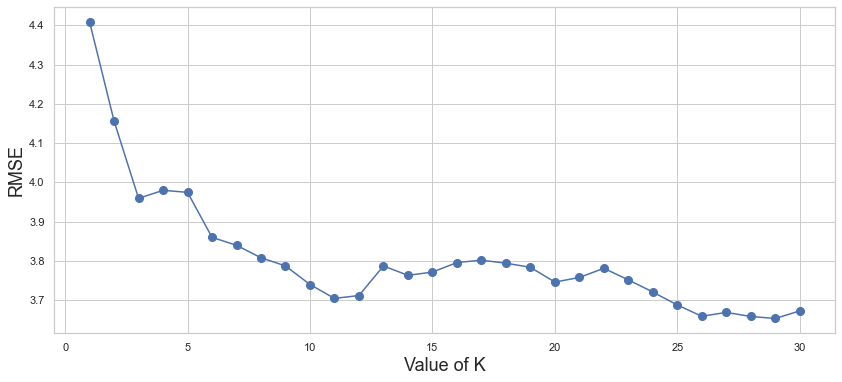

In [143]:
plt.figure(figsize=(14,6))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

at n=8 rmse is very less so try n_neighbors=8

In [144]:
knn_model  = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.6344609189259668

In [145]:
#do Prediction on Test Dataset
knn_pred1= knn_model.predict(x_test)

In [146]:
r2_score(y_test,knn_pred1)

-0.6811968701700153

In [147]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred1))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred1)))

error:
mean_squared_error: 14.503125
mean_absolute_error 2.816666666666667
sqrt_mean_squared_error 3.8082968634285854


In [148]:
#cross validation score for KNeighborsRegressor
scr=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighborsRegressor model:",scr.mean())

Cross validation score of KNeighborsRegressor model: 0.4172411461968092


## Conclusion

after using different M/L algorithm it's clear that GradientBoostingRegressor  giving the best accuracy, use it to predict the test data

## Saving the model

In [149]:
import joblib
joblib.dump(gbr,"Abalone_project.pkl")

['Abalone_project.pkl']

## Loading the saved model

In [150]:
model=joblib.load("Abalone_project.pkl")

In [151]:
prediction=model.predict(x_test)

In [152]:
scr=cross_val_score(model,x,y,cv=5)
print("Cross validation score of GradientBoostRegressor model:",scr.mean())

Cross validation score of GradientBoostRegressor model: 0.4420825765362091
